<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/ET_Feature_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Feature Importance Explained

Feature importance refers to techniques that assign a score to input features based on how useful they are in predicting a target variable. In simpler terms, it tells you which features in your dataset contribute most to the model's predictions. Understanding feature importance can be crucial for several reasons:

1.  **Interpretability**: It helps you understand the underlying relationships in your data and how different features influence the model's decisions.
2.  **Feature Selection**: By identifying less important features, you can remove them to reduce model complexity, prevent overfitting, speed up training, and potentially improve performance.
3.  **Domain Knowledge**: It can provide insights into the problem domain, confirming existing hypotheses or revealing new patterns.
4.  **Error Analysis**: Understanding which features are most influential can help in debugging models or understanding why they make certain mistakes.

There are various methods to calculate feature importance, which can broadly be categorized into a few types:

### 1. Model-Specific Methods

These methods are intrinsic to certain model types and leverage their internal structure to derive importance scores.

*   **Tree-based Models (e.g., Decision Trees, Random Forests, Gradient Boosting)**:
    *   **Gini Importance (Mean Decrease Impurity - MDI)**: For models like Decision Trees and Random Forests, features are chosen to split nodes based on how much they reduce impurity (e.g., Gini impurity or entropy). The total reduction in impurity attributed to a feature across all trees (or splits in a single tree) is averaged to give its importance score.
    *   **Permutation Importance**: While not strictly model-specific, it's often used with tree-based models. It measures the decrease in a model's score when a single feature is randomly shuffled. This breaks the relationship between the feature and the target, and the drop in performance indicates the feature's importance.

*   **Linear Models (e.g., Linear Regression, Logistic Regression)**:
    *   **Coefficients**: In linear models, the absolute magnitude of the coefficients can indicate feature importance. Larger absolute coefficients suggest a stronger influence on the target variable. However, this is only valid if features are scaled similarly; otherwise, features with larger scales might have smaller coefficients even if they are important.

### 2. Model-Agnostic Methods

These methods can be applied to any trained machine learning model, making them very versatile.

*   **Permutation Importance**: As mentioned above, it works by shuffling a single feature's values and observing the impact on the model's performance. It's a robust method that directly measures how much a feature contributes to the model's predictive power.

*   **SHAP (SHapley Additive exPlanations)**:
    *   Inspired by cooperative game theory, SHAP values explain the prediction of an instance by computing the contribution of each feature to the prediction. It assigns an importance value to each feature for each prediction, providing both global and local interpretability. SHAP can reveal whether a feature has a positive or negative impact on the prediction.

*   **LIME (Local Interpretable Model-agnostic Explanations)**:
    *   LIME aims to explain individual predictions of any classifier or regressor by approximating it locally with an interpretable model (e.g., a linear model or decision tree). It perturbs the input data, gets predictions from the black-box model, and then uses these perturbed samples and their predictions to train a simple interpretable model, from which feature importance can be derived.

### Considerations and Caveats

*   **Correlation**: If features are highly correlated, their individual importance scores might be diluted or misattributed. For example, if two features provide similar information, their importance might be split between them, making both appear less important than they truly are if considered in isolation.
*   **Context Dependency**: Feature importance can vary depending on the model, dataset, and even the evaluation metric used.
*   **Interpretation**: While these methods provide scores, it's crucial to interpret them within the context of your problem and domain knowledge. A high importance score doesn't necessarily imply causality.
*   **Stability**: Some methods, especially those involving randomness (like permutation importance with small subsets), can produce slightly different results across multiple runs. Averaging over several runs can help.

In summary, feature importance is a powerful tool for understanding your models and data. The choice of method often depends on the type of model you are using, the interpretability requirements, and the specific insights you are seeking.

In [2]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

In [3]:
X,y=make_classification(n_samples=5,n_classes=2,
                        n_features=2,n_informative=2,n_redundant=0,
                        random_state=0)

In [4]:
clf=DecisionTreeClassifier()

In [6]:
clf.fit(X,y)

DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'x[0] <= -0.875\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[0] <= 1.01\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

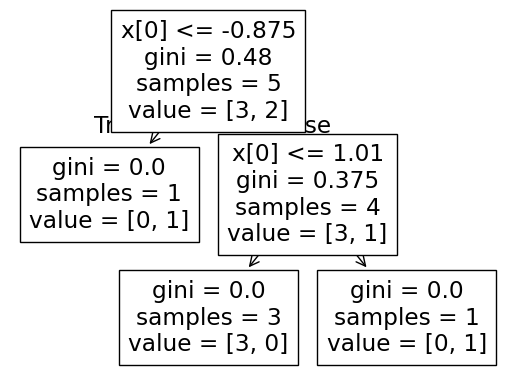

In [7]:
from sklearn.tree import plot_tree
plot_tree(clf)

In [8]:
clf.feature_importances_

array([1., 0.])

#Another Program

In [9]:
import pandas as pd

data = {
    'Rooms': [1, 2, 3, 4, 3, 2, 5, 4, 1, 3],
    'Area_sqft': [400, 600, 800, 1000, 850, 650, 1200, 1100, 450, 900],
    'Bathrooms': [1, 1, 2, 2, 2, 1, 3, 2, 1, 2],
    'Age_of_House': [10, 8, 5, 3, 6, 9, 2, 4, 12, 5],
    'Price': [30, 45, 65, 85, 70, 50, 110, 95, 35, 75]
}

df = pd.DataFrame(data)
df


,Rooms,Area_sqft,Bathrooms,Age_of_House,Price
0,1,400,1,10,30
1,2,600,1,8,45
2,3,800,2,5,65
3,4,1000,2,3,85
4,3,850,2,6,70
5,2,650,1,9,50
6,5,1200,3,2,110
7,4,1100,2,4,95
8,1,450,1,12,35
9,3,900,2,5,75


In [10]:
X = df.drop('Price', axis=1)
y = df['Price']


In [11]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X, y)


DecisionTreeRegressor(random_state=42)

In [12]:
importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df


,Feature,Importance
0,Rooms,0.764405
1,Area_sqft,0.229537
3,Age_of_House,0.006058
2,Bathrooms,0.000000


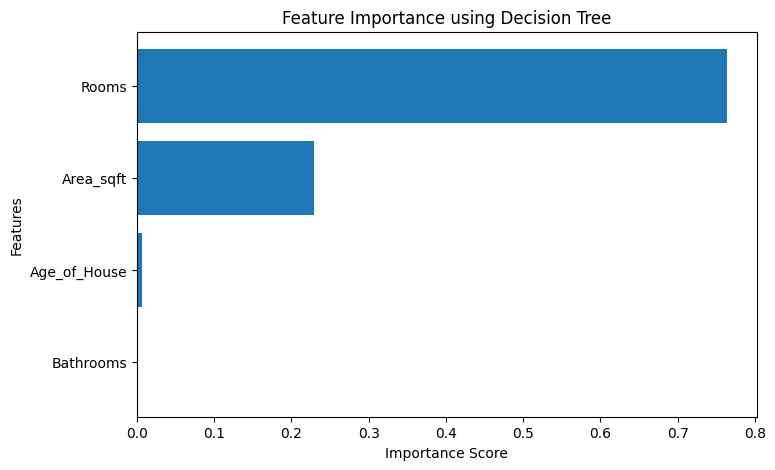

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance using Decision Tree')
plt.gca().invert_yaxis()
plt.show()


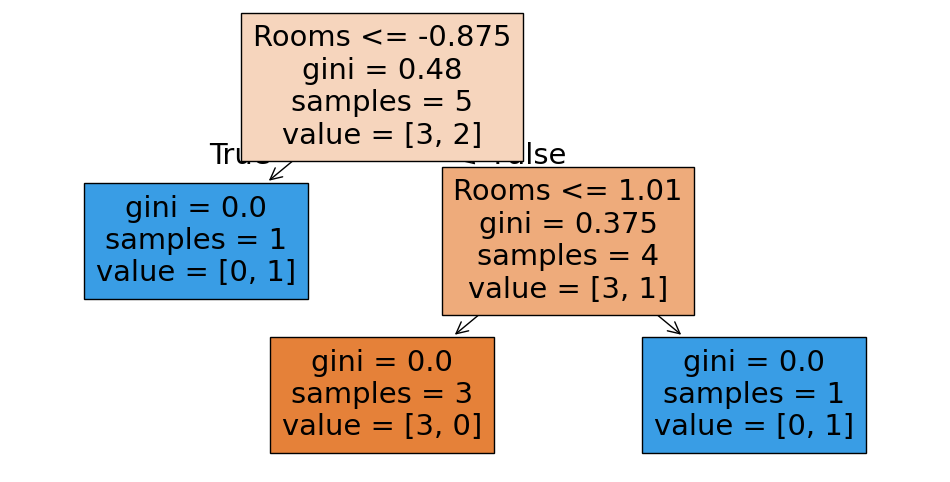

In [14]:
plt.figure(figsize=(12,6))
plot_tree(clf, feature_names=['Rooms'], filled=True)
plt.show()


STUDENT MARKS → PASS / FAIL

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

data = {
    'Marks': [20, 30, 35, 40, 50, 60, 70, 80, 90],
    'Result': [0, 0, 0, 0, 1, 1, 1, 1, 1]   # 0 = Fail, 1 = Pass
}

df = pd.DataFrame(data)


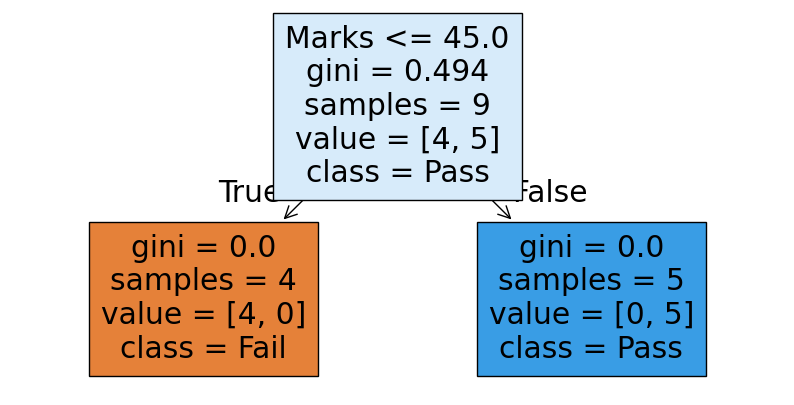

In [16]:
X = df[['Marks']]
y = df['Result']

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

plt.figure(figsize=(10,5))
plot_tree(clf, feature_names=['Marks'], class_names=['Fail','Pass'], filled=True)
plt.show()


#WEATHER → PLAY CRICKET

In [17]:
data = {
    'Temperature': [30, 25, 28, 35, 40, 20, 18, 22],
    'Humidity': [80, 60, 65, 85, 90, 55, 50, 58],
    'Windy': [0, 1, 0, 0, 1, 1, 0, 1],
    'Play_Cricket': [1, 1, 1, 0, 0, 1, 1, 1]
}

df = pd.DataFrame(data)


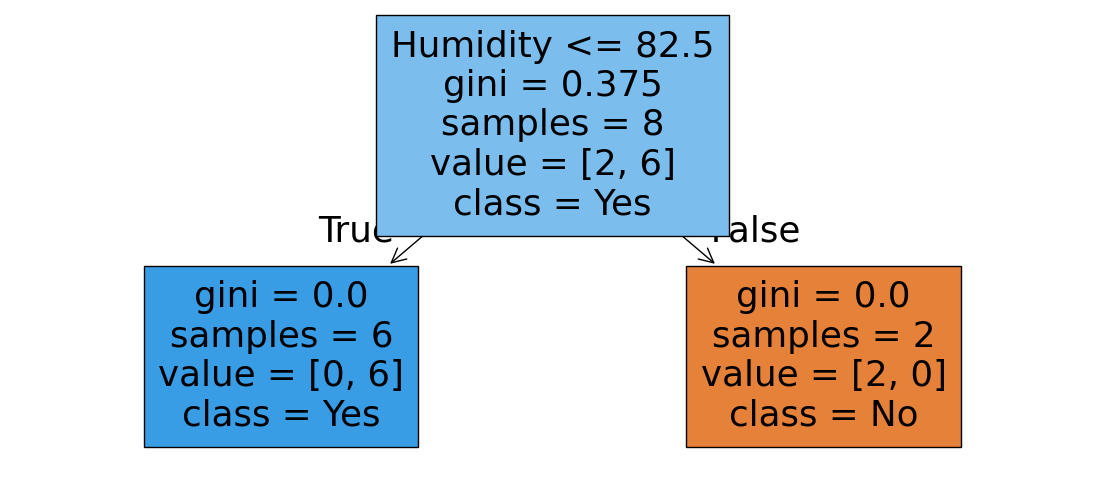

In [18]:
X = df[['Temperature', 'Humidity', 'Windy']]
y = df['Play_Cricket']

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

plt.figure(figsize=(14,6))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True
)
plt.show()
